In [ ]:
import pandas as pd

# Đọc file bạn đã upload
# Changed the file path from absolute path to relative path
df = pd.read_csv("spam.csv", encoding="latin-1")

# Xem thông tin cơ bản
print(" Cột trong file:", df.columns.tolist())
print("\n 5 dòng đầu tiên:\n", df.head())

 Cột trong file: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

 5 dòng đầu tiên:
      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Đọc dữ liệu từ file Kaggle spam.csv
df = pd.read_csv('spam.csv', encoding='latin-1')

# 2. Giữ lại 2 cột chính và đổi tên
df = df[['v1', 'v2']]
df.columns = ['label', 'message']  # Cột v1 chứa spam/ham, cột v2 là nội dung tin nhắn. Đổi tên để dễ hiểu: label và message

# 3. Chuyển nhãn 'ham' và 'spam' thành 0 và 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})   # ham → 0 (không phải spam). spam → 1 (là spam)

# 4. Tách dữ liệu thành input (X) và output (y)
X = df['message']   # X: nội dung tin nhắn. y: nhãn 0 hoặc 1
y = df['label']

# 5. Vector hóa văn bản với TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
# Mô hình không hiểu văn bản, nên ta dùng TF-IDF để biến mỗi tin nhắn thành một vector số học (toán học).
# Mỗi từ trong tin nhắn sẽ là một đặc trưng (feature), và giá trị của từ đó sẽ dựa vào mức độ quan trọng trong tập dữ liệu.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Đọc dữ liệu từ file Kaggle spam.csv
df = pd.read_csv('spam.csv', encoding='latin-1')

# 2. Giữ lại 2 cột chính và đổi tên
df = df[['v1', 'v2']]
df.columns = ['label', 'message']  # Cột v1 chứa spam/ham, cột v2 là nội dung tin nhắn. Đổi tên để dễ hiểu: label và message

# 3. Chuyển nhãn 'ham' và 'spam' thành 0 và 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})   # ham → 0 (không phải spam). spam → 1 (là spam)

# 4. Tách dữ liệu thành input (X) và output (y)
X = df['message']   # X: nội dung tin nhắn. y: nhãn 0 hoặc 1
y = df['label']

# 5. Vector hóa văn bản với TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(df['message'])
# Mô hình không hiểu văn bản, nên ta dùng TF-IDF để biến mỗi tin nhắn thành một vector số học (toán học).
# Mỗi từ trong tin nhắn sẽ là một đặc trưng (feature), và giá trị của từ đó sẽ dựa vào mức độ quan trọng trong tập dữ liệu.

# 6. Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
# X_train  80% dữ liệu tin nhắn để huấn luyện mô hình(Tin nhắn huấn luyện)
# X_test   20% tin nhắn còn lại để kiểm tra mô hình (Tin nhắn chưa thấy)
# y_train Nhãn (spam hoặc không) tương ứng với `X_train` (Biết cái nào là spam)
# y_test Nhãn thực tế của `X_test` để kiểm tra mô hình đoán đúng không (Biết mô hình đoán đúng/sai)
# train_test_split la Hàm dùng để chia ngẫu nhiên dữ liệu ra 2 phần: huấn luyện và kiểm tra
# test_size=0.2 la 20% dữ liệu để kiểm tra, 80% để huấn luyện(bài nhiều dữ liệu nên để 0.2)
# random_state la Đảm bảo chia ngẫu nhiên nhưng lặp lại được, lần sau chia vẫn như vậy

# 7. Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
#Ở đây, thuật toán Logistic Regression đang học:
# Nếu một tin nhắn có những từ như: free, win, prize, urgent, thì có xác suất cao là spam.
# Ngược lại, những từ như: hi, meeting, ok, mom thì có khả năng là ham.
# Mô hình tìm cách tính trọng số (weight) cho mỗi từ, rồi kết hợp lại bằng công thức sigmoid để dự đoán xác suất thư đó là spam.
# Bạn đang dạy mô hình học cách phân biệt tin nhắn "spam" và "không spam" dựa vào nội dung tin nhắn mà bạn đã gắn nhãn sẵn.

# 8. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
# Dòng này dùng mô hình Logistic Regression để dự đoán kết quả của tập kiểm tra (X_test).
# X_test: chứa 20% dữ liệu bạn chưa dùng để huấn luyện.
# y_pred: là kết quả dự đoán từ mô hình (0 = ham, 1 = spam).
print(" Accuracy:", accuracy_score(y_test, y_pred))
# Hàm này so sánh kết quả dự đoán (y_pred) với nhãn thật (y_test) → Trả về độ chính xác (Accuracy) của mô hình.
print("\n Classification Report:\n", classification_report(y_test, y_pred))
# precision Mô hình nói là spam, thì đúng bao nhiêu phần trăm
# recall Trong tổng số spam thật, mô hình tìm được bao nhiêu
# f1-score  Trung bình giữa precision và recall (quan trọng nhất)
# support Số lượng thật sự của từng loại (spam, không spam)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Dự đoán:           Ham (0)   spam (1)
# Thật là Ham (0)    962(TN)    3(FP)
#         Spam (1)   59(FN)     91(TP)


# 9. Hàm kiểm tra tin nhắn mới
def predict_spam(message):
    msg_vec = vectorizer.transform([message])
    prediction = model.predict(msg_vec)
    return "Spam " if prediction[0] else "Not Spam "

# 10. Thử nghiệm
test_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
print("\n Test message prediction:", predict_spam(test_message))

 Accuracy: 0.9443946188340807

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115


 Confusion Matrix:
 [[962   3]
 [ 59  91]]

 Test message prediction: Spam 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

# 🔹 Bước 1: Đọc dữ liệu từ file Kaggle đã upload
# Changed the file path from absolute path to relative path
df = pd.read_csv('spam.csv', encoding='latin-1')

# 🔹 Bước 2: Giữ 2 cột cần thiết: nhãn và nội dung
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# 🔹 Bước 3: Chuyển đổi nhãn 'ham' → 0, 'spam' → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 🔹 Bước 4: Vector hóa nội dung văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# 🔹 Bước 5: Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Bước 6: Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔹 Bước 7: Đánh giá mô hình
y_pred = model.predict(X_test)
print(" Kết quả đánh giá mô hình:")
print(classification_report(y_test, y_pred))

# 🔹 Bước 8: Hàm lọc thư
def classify_message(message):
    msg_vec = vectorizer.transform([message])
    pred = model.predict(msg_vec)[0]
    return " Không phải spam" if pred == 0 else " SPAM!"

# 🔹 Bước 9: Dùng thử lọc một vài thư
test_messages = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hi Mom, I'm coming home late tonight. Love you.",
    "URGENT! Your account is blocked. Click here to reactivate.",
    "Lunch at 12?"
]

print("\n Kiểm tra lọc thư:")
for msg in test_messages:
    print(f" {msg}\n   → {classify_message(msg)}\n")

# 🔹 Bước 10 (Tuỳ chọn): Lưu mô hình và vectorizer để dùng lại sau
# If you intend to save to /mnt/data/, ensure the directory exists and is writable.
# Otherwise, save to the current directory or a known path like /tmp/
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "spam_vectorizer.pkl")

 Kết quả đánh giá mô hình:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115


 Kiểm tra lọc thư:
 Congratulations! You've won a free iPhone. Claim now!
   →  SPAM!

 Hi Mom, I'm coming home late tonight. Love you.
   →  Không phải spam

 URGENT! Your account is blocked. Click here to reactivate.
   →  Không phải spam

 Lunch at 12?
   →  Không phải spam



['spam_vectorizer.pkl']

<ipython-input-25-d2079388926a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


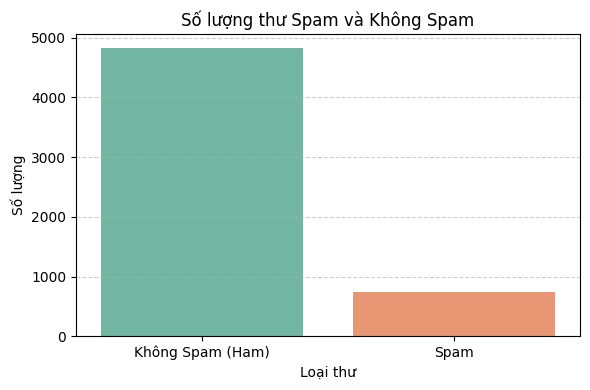

In [ ]:
# Đọc lại file spam.csv mới được tải lên
# Changed the file path from absolute path to relative path to match the previous successful reads
df = pd.read_csv('spam.csv', encoding='latin-1')

# Giữ lại các cột cần thiết
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Đếm số lượng mỗi loại thư
label_counts = df['label'].value_counts()

# Ensure matplotlib and seaborn are imported for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ số lượng thư spam và không spam
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Số lượng thư Spam và Không Spam')
plt.xlabel('Loại thư')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Không Spam (Ham)', 'Spam'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()